<a href="https://colab.research.google.com/github/Daksh-Raghuvanshi/EEG-Processing/blob/main/Copy_of_EEG_peak_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from tensorflow import keras
import tensorflow.compat.v2.feature_column as fc
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import math
import scipy
from scipy import signal
import warnings
from sklearn.linear_model import LinearRegression
from keras.models import Sequential, Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/EEG Artifact Removal/Trial2.csv', header=None)

In [ ]:
numpyData2 = np.array(data2)
data_clean = numpyData2[:, 11]
data_noisy = numpyData2[:, 12]

In [ ]:
mean_DataClean = np.mean(data_clean)
mean_DataNoisy = np.mean(data_noisy)
clean_data = data_clean/mean_DataClean
noisy_data = data_noisy/mean_DataNoisy

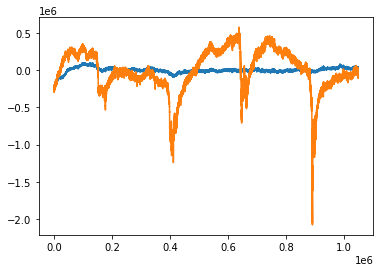

In [ ]:
plt.plot(clean_data)
plt.plot(noisy_data)

In [ ]:
i = 1

moving_averages = []
  

cum_sum = np.cumsum(noisy_data);
  

while i <= len(noisy_data):
  
    
    window_average = round(cum_sum[i-1] / i, 2)
      
    moving_averages.append(window_average)
      
    
    i += 1


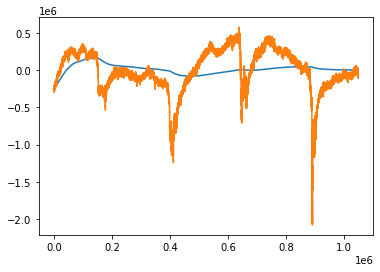

In [ ]:
plt.plot(moving_averages)
plt.plot(noisy_data)
#plt.plot(clean_data)

In [ ]:
moving_averages1 = np.zeros(len(moving_averages))
for i in range(0, len(moving_averages)):
  if(moving_averages[i]<0):
    moving_averages1[i] = (0.009)*(10**6)
  else:
    moving_averages1[i] = moving_averages[i]
moving_averages2 = np.zeros(len(moving_averages))
for i in range(0, len(moving_averages)):
  moving_averages2[i] = moving_averages[i] - ((0.1)*(10**6))

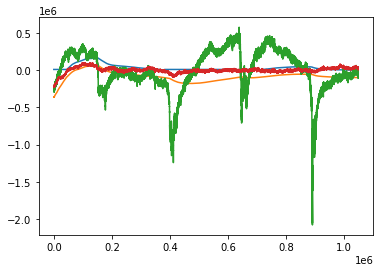

In [ ]:
plt.plot(moving_averages1)
plt.plot(moving_averages2)
plt.plot(noisy_data)
plt.plot(clean_data)

In [ ]:
irx=np.zeros(len(moving_averages2))
for i in range(0, len(moving_averages1)):
  if noisy_data[i]>moving_averages1[i]:
    irx[i]=i

idx = np.where(irx==0)
index1 = np.delete(irx, idx)
index1 = index1.astype(int)

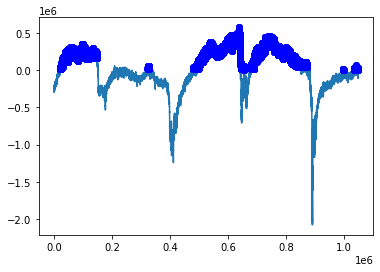

In [ ]:
plt.plot(noisy_data)
plt.plot(index1, noisy_data[index1], 'bo')

In [ ]:
irx = np.zeros(len(index1))
for i in range(1, len(index1)-1):
  if (noisy_data[index1[i-1]] < noisy_data[index1[i]]) and (noisy_data[index1[i+1]] < noisy_data[index1[i]]):
    irx[i] = index1[i]
len(index1)

463634

In [ ]:
idx = np.where(irx==0)
irx = np.delete(irx, idx)
irx = irx.astype(int)

In [ ]:
len(irx)

44366

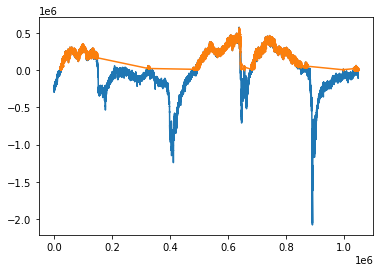

In [ ]:
plt.plot(noisy_data)
plt.plot(irx, noisy_data[irx], marker="o", markersize=0.5, markerfacecolor='green')

In [ ]:
arr = noisy_data[irx]

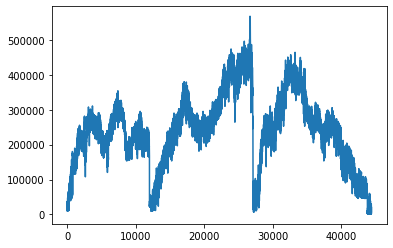

In [ ]:
plt.plot(arr)

In [ ]:
irx2 = np.zeros(len(irx))
for i in range(1, len(irx)-1):
  if (noisy_data[irx[i-1]] < noisy_data[irx[i]]) and (noisy_data[irx[i+1]] < noisy_data[irx[i]]):
    irx2[i] = irx[i]
len(irx2)

44366

In [ ]:
idx2 = np.where(irx2==0)
irx2 = np.delete(irx2, idx2)
irx2 = irx2.astype(int)

In [ ]:
len(irx2)

7766

In [ ]:
arr2 = noisy_data[irx2]

In [ ]:
len(arr2)

7766

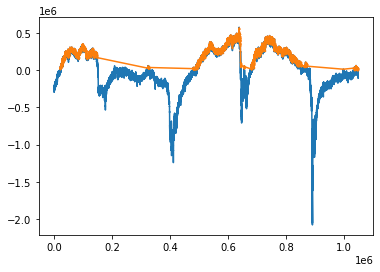

In [ ]:
plt.plot(noisy_data)
plt.plot(irx2, noisy_data[irx2], marker="o", markersize=0.5, markerfacecolor='green')

In [ ]:
irx3 = np.zeros(len(irx2))
for i in range(1, len(irx2)-1):
  if (noisy_data[irx2[i-1]] < noisy_data[irx2[i]]) and (noisy_data[irx2[i+1]] < noisy_data[irx2[i]]):
    irx3[i] = irx2[i]
len(irx3)

7766

In [ ]:
idx3 = np.where(irx3==0)
irx3 = np.delete(irx3, idx3)
irx3 = irx3.astype(int)

In [ ]:
len(irx3)

2015

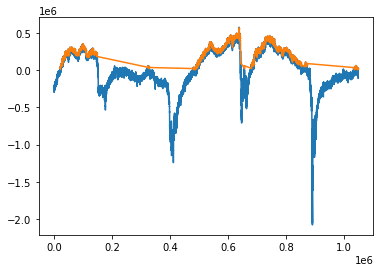

In [ ]:
plt.plot(noisy_data)
plt.plot(irx3, noisy_data[irx3], marker="o", markersize=0.5, markerfacecolor='green')

In [ ]:
irx4 = np.zeros(len(irx3))
for i in range(1, len(irx3)-1):
  if (noisy_data[irx3[i-1]] < noisy_data[irx3[i]]) and (noisy_data[irx3[i+1]] < noisy_data[irx3[i]]):
    irx4[i] = irx3[i]
len(irx4)

2015

In [ ]:
idx4 = np.where(irx4==0)
irx4 = np.delete(irx4, idx4)
irx4 = irx4.astype(int)

In [ ]:
len(irx4)

566

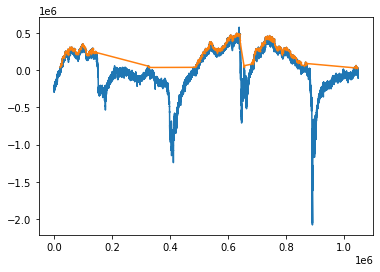

In [ ]:
plt.plot(noisy_data)
plt.plot(irx4, noisy_data[irx4], marker="o", markersize=0.5, markerfacecolor='green')

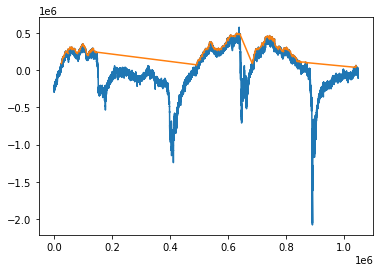

In [ ]:
irx5 = np.zeros(len(irx4))
for i in range(1, len(irx4)-1):
  if (noisy_data[irx4[i-1]] < noisy_data[irx4[i]]) and (noisy_data[irx4[i+1]] < noisy_data[irx4[i]]):
    irx5[i] = irx4[i]
len(irx5)
idx5 = np.where(irx5==0)
irx5 = np.delete(irx5, idx5)
irx5 = irx5.astype(int)
plt.plot(noisy_data)
plt.plot(irx5, noisy_data[irx5], marker="o", markersize=0.5, markerfacecolor='green')

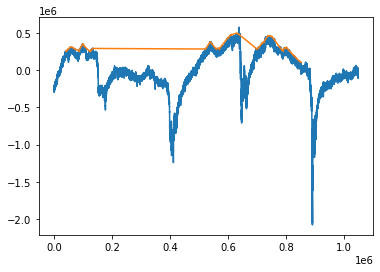

In [ ]:
irx6 = np.zeros(len(irx5))
for i in range(1, len(irx5)-1):
  if (noisy_data[irx5[i-1]] < noisy_data[irx5[i]]) and (noisy_data[irx5[i+1]] < noisy_data[irx5[i]]):
    irx6[i] = irx5[i]
len(irx6)
idx6 = np.where(irx6==0)
irx6 = np.delete(irx6, idx6)
irx6 = irx6.astype(int)
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(irx6, noisy_data[irx6], marker="o", markersize=0.5, markerfacecolor='red')

In [ ]:
len(irx6)

36

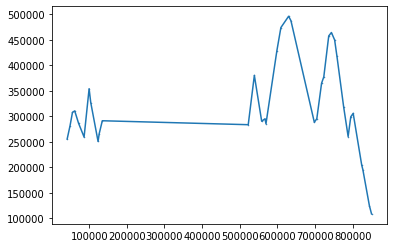

In [ ]:
plt.plot(irx6, noisy_data[irx6], marker="o", markersize=0.5, markerfacecolor='red')

In [ ]:
ivx=np.zeros(len(moving_averages2))
for i in range(0, len(moving_averages2)):
  if noisy_data[i]<moving_averages2[i]:
    ivx[i]=i

inx = np.where(ivx==0)
index2 = np.delete(ivx, inx)
index2 = index2.astype(int)

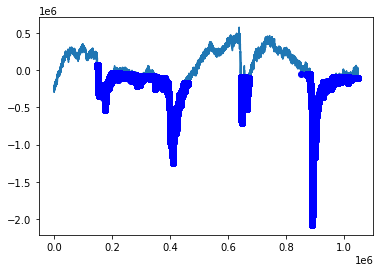

In [ ]:
plt.plot(noisy_data)
plt.plot(index2, noisy_data[index2], 'bo')

33617


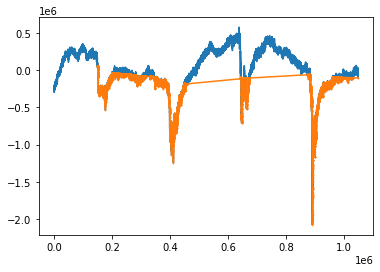

In [ ]:
ivx2 = np.zeros(len(index2))
for i in range(1, len(index2)-1):
  if (noisy_data[index2[i-1]] > noisy_data[index2[i]]) and (noisy_data[index2[i+1]] > noisy_data[index2[i]]):
    ivx2[i] = index2[i]
len(ivx2)
inx2 = np.where(ivx2==0)
ivx2 = np.delete(ivx2, inx2)
ivx2 = ivx2.astype(int)
print(len(ivx2))
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(ivx2, noisy_data[ivx2], marker="o", markersize=0.5, markerfacecolor='red')

5742


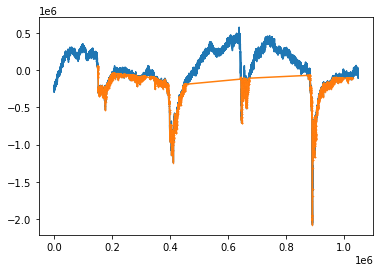

In [ ]:
ivx3 = np.zeros(len(ivx2))
for i in range(1, len(ivx2)-1):
  if (noisy_data[ivx2[i-1]] > noisy_data[ivx2[i]]) and (noisy_data[ivx2[i+1]] > noisy_data[ivx2[i]]):
    ivx3[i] = ivx2[i]
len(ivx3)
inx3 = np.where(ivx3==0)
ivx3 = np.delete(ivx3, inx3)
ivx3 = ivx3.astype(int)
print(len(ivx3))
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(ivx3, noisy_data[ivx3], marker="o", markersize=0.5, markerfacecolor='red')

1476


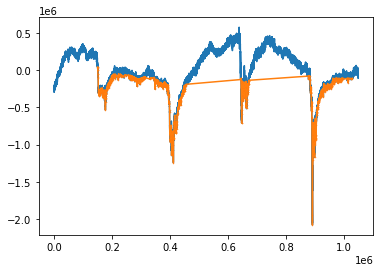

In [ ]:
ivx4 = np.zeros(len(ivx3))
for i in range(1, len(ivx3)-1):
  if (noisy_data[ivx3[i-1]] > noisy_data[ivx3[i]]) and (noisy_data[ivx3[i+1]] > noisy_data[ivx3[i]]):
    ivx4[i] = ivx3[i]
len(ivx4)
inx4 = np.where(ivx4==0)
ivx4 = np.delete(ivx4, inx4)
ivx4 = ivx4.astype(int)
print(len(ivx4))
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(ivx4, noisy_data[ivx4], marker="o", markersize=0.5, markerfacecolor='red')

389


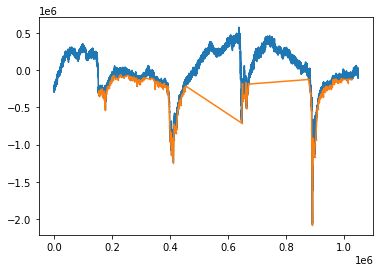

In [ ]:
ivx5 = np.zeros(len(ivx4))
for i in range(1, len(ivx4)-1):
  if (noisy_data[ivx4[i-1]] > noisy_data[ivx4[i]]) and (noisy_data[ivx4[i+1]] > noisy_data[ivx4[i]]):
    ivx5[i] = ivx4[i]
len(ivx5)
inx5 = np.where(ivx5==0)
ivx5 = np.delete(ivx5, inx5)
ivx5 = ivx5.astype(int)
print(len(ivx5))
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(ivx5, noisy_data[ivx5], marker="o", markersize=0.5, markerfacecolor='red')

104


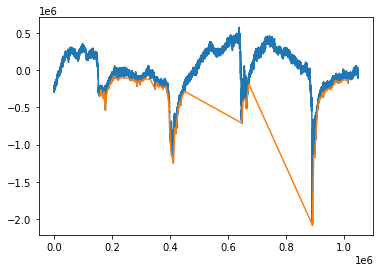

In [ ]:
ivx6 = np.zeros(len(ivx5))
for i in range(1, len(ivx5)-1):
  if (noisy_data[ivx5[i-1]] > noisy_data[ivx5[i]]) and (noisy_data[ivx5[i+1]] > noisy_data[ivx5[i]]):
    ivx6[i] = ivx5[i]
len(ivx6)
inx6 = np.where(ivx6==0)
ivx6 = np.delete(ivx6, inx6)
ivx6 = ivx6.astype(int)
print(len(ivx6))
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(ivx6, noisy_data[ivx6], marker="o", markersize=0.5, markerfacecolor='red')

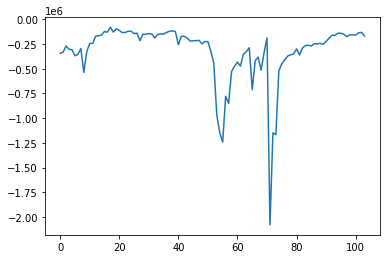

In [ ]:
plt.plot(noisy_data[ivx6])

25


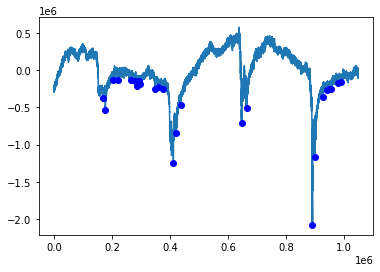

In [ ]:
ivx7 = np.zeros(len(ivx6))
for i in range(1, len(ivx6)-1):
  if (noisy_data[ivx6[i-1]] > noisy_data[ivx6[i]]) and (noisy_data[ivx6[i+1]] > noisy_data[ivx6[i]]):
    ivx7[i] = ivx6[i]
len(ivx7)
inx7 = np.where(ivx7==0)
ivx7 = np.delete(ivx7, inx7)
ivx7 = ivx7.astype(int)
print(len(ivx7))
plt.plot(noisy_data)
#plt.plot(clean_data)
plt.plot(ivx7, noisy_data[ivx7], 'bo')

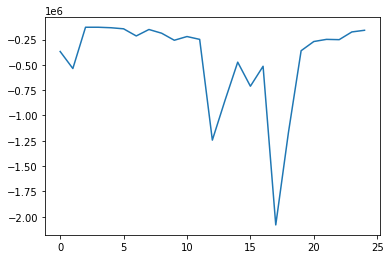

In [ ]:
plt.plot(noisy_data[ivx7])

In [ ]:
labels = np.zeros(len(noisy_data))
labels[irx6] = 1

In [ ]:
labels

array([0., 0., 0., ..., 0., 0., 0.])

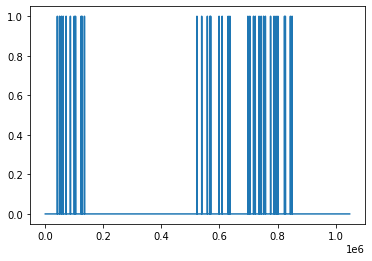

In [ ]:
plt.plot(labels)

In [ ]:
labels[ivx7] = 2

In [ ]:
labels

array([0., 0., 0., ..., 0., 0., 0.])

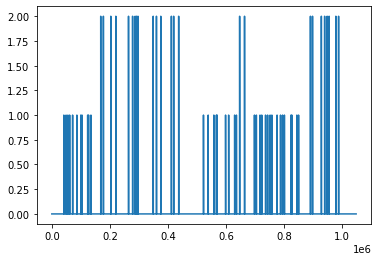

In [ ]:
plt.plot(labels)

In [ ]:
noisy_data

array([-262966.17104793, -264896.75011361, -264896.75011361, ...,
        -89123.0570967 ,  -86225.68853049,  -83328.31996428])

In [ ]:
clean_data

array([-227946.04857631, -228820.82838752, -228528.90178559, ...,
          7931.64577432,    8515.49897818,    9391.27878395])

In [ ]:
X = np.stack((noisy_data, clean_data), axis=-1)

In [ ]:
X

array([[-262966.17104793, -227946.04857631],
       [-264896.75011361, -228820.82838752],
       [-264896.75011361, -228528.90178559],
       ...,
       [ -89123.0570967 ,    7931.64577432],
       [ -86225.68853049,    8515.49897818],
       [ -83328.31996428,    9391.27878395]])

In [ ]:
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5000)

In [ ]:
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [ ]:
X_train

array([[ 292363.8041213 ,  -14838.62917589],
       [ -25380.94864002,   31869.62713224],
       [ 216066.4318777 ,    7931.64577432],
       ...,
       [ -49525.6866918 ,    6763.93936662],
       [-281315.17198881,  -13087.06956433],
       [-135480.95415611,   31869.62713224]])

In [ ]:
y_train.shape

(734003, 3)

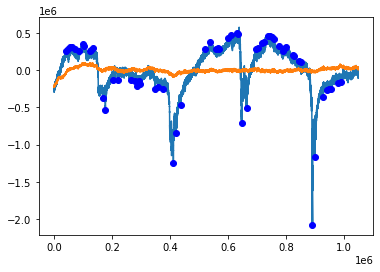

In [ ]:
plt.plot(noisy_data)
plt.plot(clean_data)
plt.plot(irx6, noisy_data[irx6], 'bo')
plt.plot(ivx7, noisy_data[ivx7], 'bo')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, input_shape=(2,), activation='relu')) #Inpput Layer
model.add(tf.keras.layers.Dense(8, activation='relu')) #Hidden Layer 1
model.add(tf.keras.layers.Dense(16, activation='relu')) #Hidden Layer 2
model.add(tf.keras.layers.Dense(3, activation='softmax')) #Output Layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


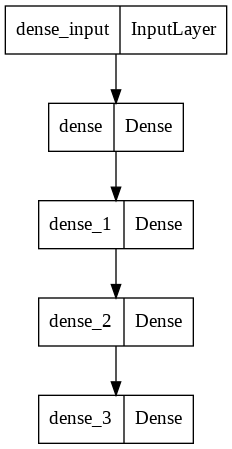

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
Y=0.001*np.exp(-X_train[0:10]/10**8)
Y

array([[0.00099708, 0.00100015],
       [0.00100025, 0.00099968],
       [0.00099784, 0.00099992],
       [0.0009962 , 0.0010002 ],
       [0.000999  , 0.00099994],
       [0.0010023 , 0.00100001],
       [0.00099997, 0.00099961],
       [0.00099691, 0.00099994],
       [0.00100344, 0.00100042],
       [0.00100091, 0.00099984]])

In [ ]:
def model_training(model, X_train, y_train, X_test, y_test, save_to, epoch=2):
  opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
  
  es = EarlyStopping(monitor='val_loss' , mode='min' , verbose = 1, patience = 10)
  checkpoint=ModelCheckpoint(save_to+'best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  learning_rate_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch/10**8))
  model.compile(optimizer=opt_adam,
                loss='categorical_crossentropy',
                metrics='accuracy')
  history=model.fit(X_train, y_train, batch_size=10000, 
                    epochs=epoch,
                    validation_data=(X_test,y_test),
                    callbacks=[checkpoint, learning_rate_schedule])
  
  saved_model = load_model(save_to + 'best_model.h5')
  return model, history

In [ ]:
y_train.shape

(734003, 3)

In [ ]:
model, history=model_training(model, X_train, y_train, X_test, y_test, save_to='./', epoch=50)

Epoch 1/50
74/74 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9999
Epoch 1: val_accuracy improved from -inf to 0.99994, saving model to ./best_model.h5
74/74 [==============================] - 1s 14ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 8.1073e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 2/50
74/74 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9999
Epoch 2: val_accuracy did not improve from 0.99994
74/74 [==============================] - 1s 13ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 7.7395e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 3/50
73/74 [============================>.] - ETA: 0s - loss: 8.0361e-04 - accuracy: 0.9999
Epoch 3: val_accuracy did not improve from 0.99994
74/74 [==============================] - 1s 11ms/step - loss: 8.1258e-04 - accuracy: 0.9999 - val_loss: 7.8937e-04 - val_accuracy: 0.9999 - lr: 1.0000e-03
Epoch 4/50
69/74 [==========================>...] - ETA: 0s - loss: 6.9160e-04

In [ ]:
model_acc=model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Acc.: {:.3f}%".format(model_acc*100))

Test Acc.: 99.994%
